In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
spdata = pd.read_pickle('SP.pkl')
mpdata = pd.read_pickle('MP.pkl')

1. Time Feature in mpdata

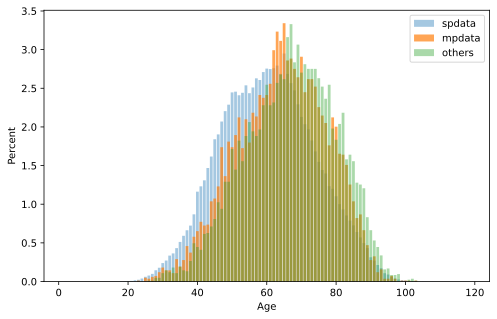

In [124]:
# 发病年龄散点图

sp_age = spdata.groupby('Age at diagnosis').size()/spdata.shape[0]*100
mp_age = mpdata[mpdata['Record number recode']==1].groupby('Age at diagnosis').size()/mpdata[mpdata['Record number recode']==1].shape[0]*100
op_age = mpdata[mpdata['Record number recode']==2].groupby('Age at diagnosis').size()/mpdata[mpdata['Record number recode']==2].shape[0]*100

plt.figure(figsize=(8, 5))
plt.bar(sp_age.index, sp_age.values, label='spdata', alpha=0.4);
plt.bar(mp_age.index, mp_age.values, label='mpdata', alpha=0.7);
plt.bar(op_age.index, op_age.values, label='others', alpha=0.4);
plt.xlabel('Age')
plt.ylabel('Percent')
plt.legend();
plt.show()

In [128]:
mpdata

,Patient ID,Record number recode,Site recode B ICD-O-3/WHO 2008 (Event Variable),Year of diagnosis,"Race recode (W, B, AI, API)",Site recode ICD-O-3/WHO 2008,Age recode with <1 year olds,Age at diagnosis,Primary Site - labeled,Histologic Type ICD-O-3,...,Vital status recode (study cutoff used),Month of diagnosis recode,Month of follow-up recode,Year of follow-up recode,Event Number,Reason for Exit,Sequence Number (Calculated),Age at Event in Months (Calculated),Months Since Index (Calculated),Person Time Years (Calculated)
0,3976105,1,Female Breast,2014,White,Breast,70-74 years,74,"C50.9-Breast, NOS",8500,...,Alive,December,December,2016,Index Record,NaN,1,,,
1,3976105,2,Melanoma of the Skin,2016,White,Melanoma of the Skin,75-79 years,75,C44.6-Skin of upper limb and shoulder,8720,...,Alive,April,December,2016,1,End of Study,2,905,16,1.55
2,3984697,1,Female Breast,2010,White,Breast,60-64 years,64,C50.4-Upper-outer quadrant of breast,8500,...,Alive,January,December,2016,Index Record,NaN,1,,,
3,3984697,2,Lung and Bronchus,2015,White,Lung and Bronchus,70-74 years,70,"C34.3-Lower lobe, lung",8480,...,Alive,June,December,2016,1,End of Study,2,842,65,6.46
4,3984714,1,Female Breast,2010,White,Breast,65-69 years,67,C50.2-Upper-inner quadrant of breast,8500,...,Alive,January,December,2016,Index Record,NaN,1,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16571,77731532,2,NHL - Nodal,2016,White,NHL - Nodal,75-79 years,76,C77.3-Lymph nodes of axilla or arm,9823,...,Alive,August,December,2016,1,End of Study,2,921,22,1.71
16572,77738727,1,Female Breast,2015,Black,Breast,40-44 years,44,"C50.9-Breast, NOS",8500,...,Dead,August,December,2016,Index Record,NaN,1,,,
16573,77738727,2,Rectum,2016,Black,Rectum,45-49 years,45,"C20.9-Rectum, NOS",8070,...,Dead,July,December,2016,1,Death,2,550,11,0.83
16574,77785763,1,Female Breast,2014,White,Breast,75-79 years,75,C50.4-Upper-outer quadrant of breast,8480,...,Dead,December,October,2016,Index Record,NaN,1,,,


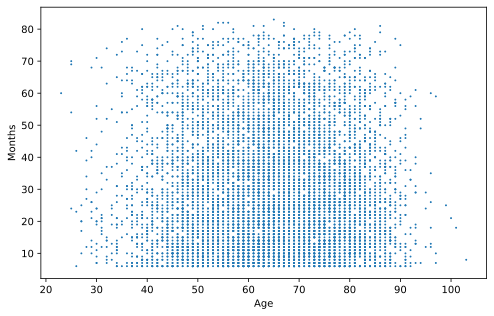

In [129]:
# 不同年龄患乳腺癌后继发其他癌的时间

timedata = pd.DataFrame()
timedata['Age at diagnosis'] = mpdata[mpdata['Record number recode']==1]['Age at diagnosis'].values
timedata['Months Since Index (Calculated)'] = mpdata[mpdata['Record number recode']==2]['Months Since Index (Calculated)'].values
timedata['Site recode ICD-O-3/WHO 2008'] = mpdata[mpdata['Record number recode']==2]['Site recode ICD-O-3/WHO 2008'].values

plt.figure(figsize=(8,5))
plt.xlabel('Age')
plt.ylabel('Months')
plt.scatter(timedata['Age at diagnosis'], timedata['Months Since Index (Calculated)'], s=1)
plt.show()

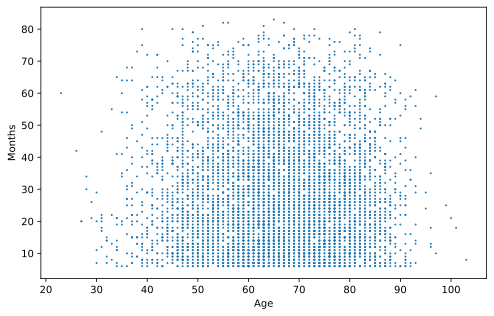

In [135]:
plt.figure(figsize=(8,5))
plt.xlabel('Age')
plt.ylabel('Months')
plt.scatter(timedata[timedata['Site recode ICD-O-3/WHO 2008']!='Breast']['Age at diagnosis'], timedata[timedata['Site recode ICD-O-3/WHO 2008']!='Breast']['Months Since Index (Calculated)'], s=1)
plt.show()

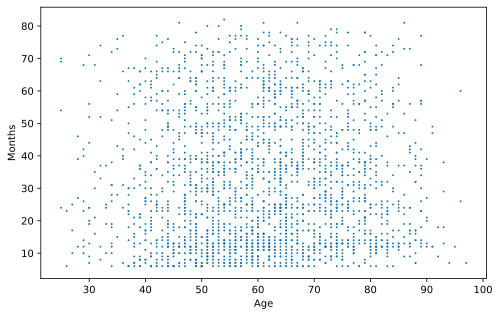

In [136]:
plt.figure(figsize=(8,5))
plt.xlabel('Age')
plt.ylabel('Months')
plt.scatter(timedata[timedata['Site recode ICD-O-3/WHO 2008']=='Breast']['Age at diagnosis'], timedata[timedata['Site recode ICD-O-3/WHO 2008']=='Breast']['Months Since Index (Calculated)'], s=1)
plt.show()